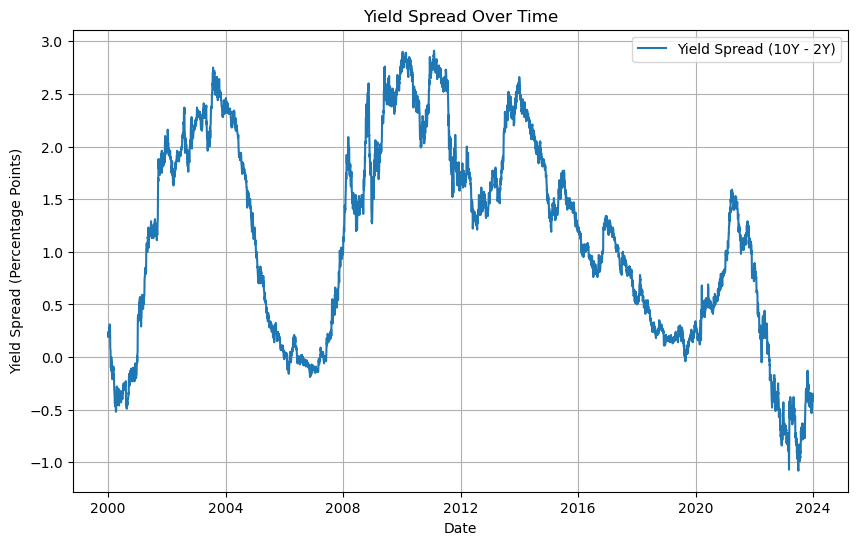

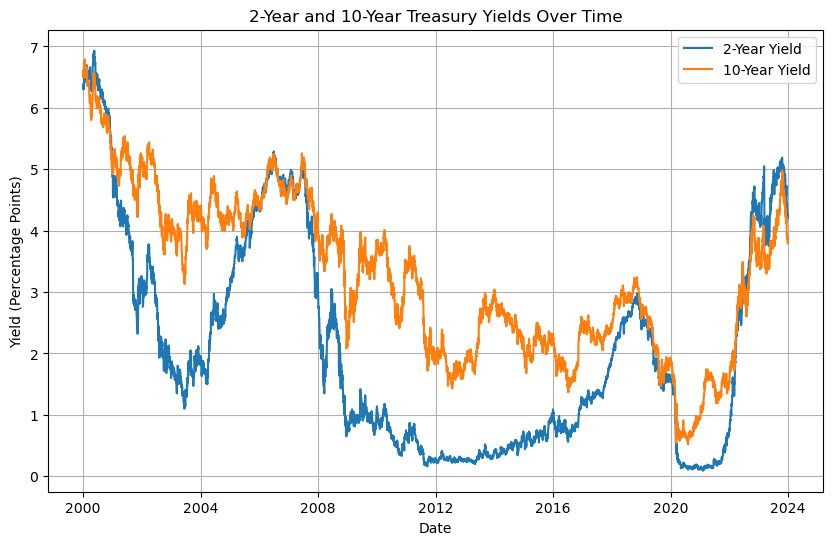

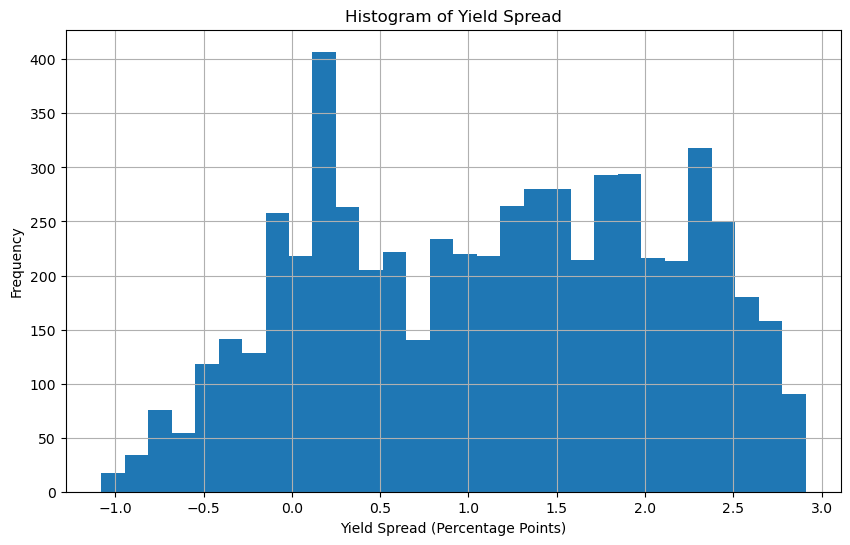

<Figure size 1000x600 with 0 Axes>

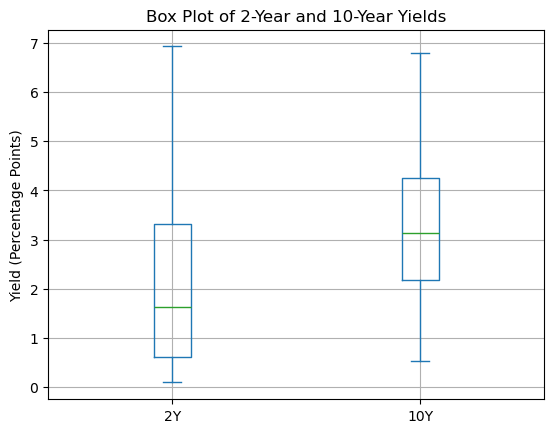

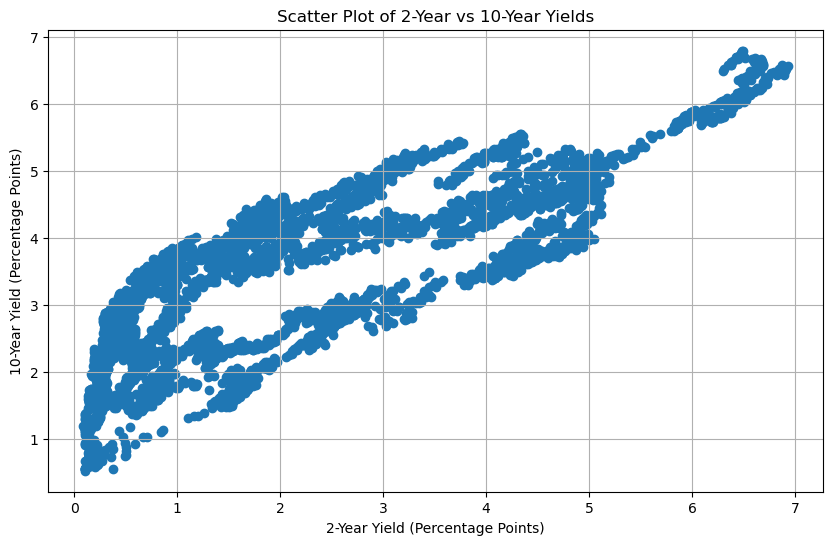

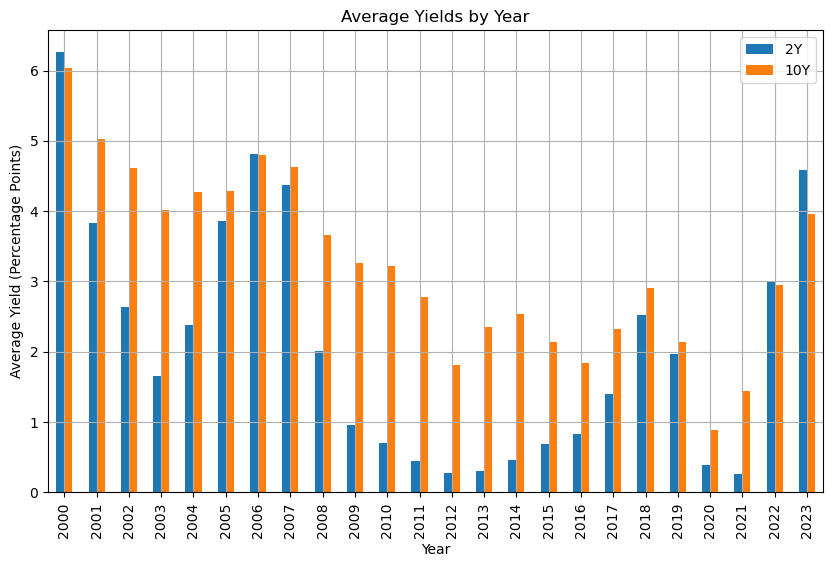

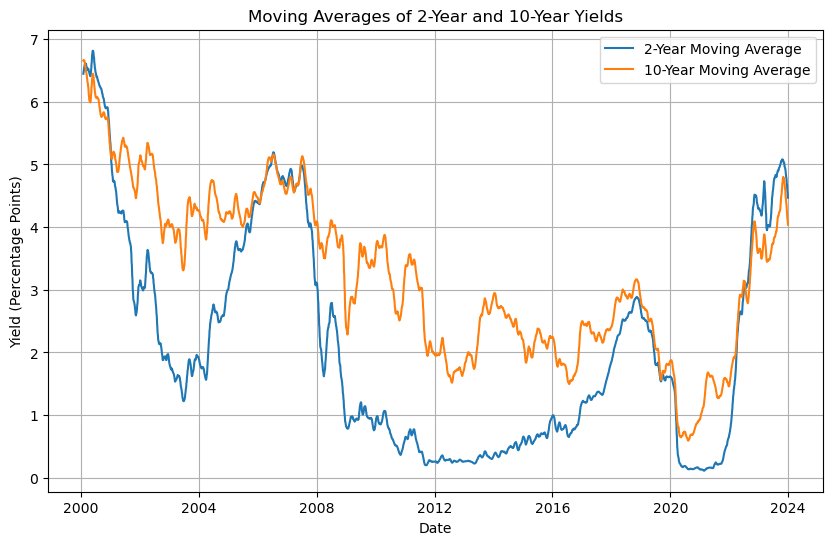

In [6]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers and date range
ticker_2y = "DGS2"
ticker_10y = "DGS10"
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Aligning and cleaning data
combined_data = pd.concat([data_2y, data_10y], axis=1).dropna()
combined_data.columns = ['2Y', '10Y']

# Calculate the spread
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Creating eight different plots
# 1. Yield Spread Over Time
plt.figure(figsize=(10, 6))
plt.plot(combined_data['Spread'], label='Yield Spread (10Y - 2Y)')
plt.title('Yield Spread Over Time')
plt.ylabel('Yield Spread (Percentage Points)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot 2-year and 10-year yields over time
plt.figure(figsize=(10, 6))
plt.plot(combined_data['2Y'], label='2-Year Yield')
plt.plot(combined_data['10Y'], label='10-Year Yield')
plt.title('2-Year and 10-Year Treasury Yields Over Time')
plt.ylabel('Yield (Percentage Points)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# 3. Histogram of Yield Spread
plt.figure(figsize=(10, 6))
combined_data['Spread'].plot(kind='hist', bins=30)
plt.title('Histogram of Yield Spread')
plt.xlabel('Yield Spread (Percentage Points)')
plt.grid(True)
plt.show()

# 4. Box Plot of Yields
plt.figure(figsize=(10, 6))
combined_data[['2Y', '10Y']].plot(kind='box')
plt.title('Box Plot of 2-Year and 10-Year Yields')
plt.ylabel('Yield (Percentage Points)')
plt.grid(True)
plt.show()

# 5. Scatter Plot Comparing 2Y and 10Y Yields
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['2Y'], combined_data['10Y'])
plt.title('Scatter Plot of 2-Year vs 10-Year Yields')
plt.xlabel('2-Year Yield (Percentage Points)')
plt.ylabel('10-Year Yield (Percentage Points)')
plt.grid(True)
plt.show()

# 6. Bar Chart of Average Yields by Year
combined_data['Year'] = combined_data.index.year
avg_yields = combined_data.groupby('Year').mean()
avg_yields[['2Y', '10Y']].plot(kind='bar', figsize=(10, 6))
plt.title('Average Yields by Year')
plt.xlabel('Year')
plt.ylabel('Average Yield (Percentage Points)')
plt.grid(True)
plt.show()

# 7. Line Plot of Moving Averages of the Yields
combined_data['2Y_MA'] = combined_data['2Y'].rolling(window=21).mean()
combined_data['10Y_MA'] = combined_data['10Y'].rolling(window=21).mean()
plt.figure(figsize=(10, 6))
plt.plot(combined_data['2Y_MA'], label='2-Year Moving Average')
plt.plot(combined_data['10Y_MA'], label='10-Year Moving Average')
plt.title('Moving Averages of 2-Year and 10-Year Yields')
plt.xlabel('Date')
plt.ylabel('Yield (Percentage Points)')
plt.legend()
plt.grid(True)
plt.show()


